In [28]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"GPU: {device}")


PyTorch menggunakan perangkat: cuda


In [29]:
import time

start_time_code = time.time()

## Import Library

In [30]:
import stanza
stanza.download('id')


2024-09-16 12:52:13 INFO: Downloaded file to C:\Users\asus.LAPTOP-P9TBK6TS.000\stanza_resources\resources.json
2024-09-16 12:52:13 INFO: Downloading default packages for language: id (Indonesian) ...
2024-09-16 12:52:15 INFO: File exists: C:\Users\asus.LAPTOP-P9TBK6TS.000\stanza_resources\id\default.zip
2024-09-16 12:52:18 INFO: Finished downloading models and saved to C:\Users\asus.LAPTOP-P9TBK6TS.000\stanza_resources


In [31]:
import pandas as pd
import numpy as np
import nltk, re, string

from sklearn import naive_bayes

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report,ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier


from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn

from nlp_id.lemmatizer import Lemmatizer

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from wordcloud import WordCloud

import joblib

from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline


nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('tokenize')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')

[nltk_data] Downloading package wordnet to C:\Users\asus.LAPTOP-
[nltk_data]     P9TBK6TS.000\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\asus.LAPTOP-
[nltk_data]     P9TBK6TS.000\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\asus.LAPTOP-
[nltk_data]     P9TBK6TS.000\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Error loading tokenize: Package 'tokenize' not found in
[nltk_data]     index
[nltk_data] Downloading package averaged_perceptron_tagger to C:\Users
[nltk_data]     \asus.LAPTOP-P9TBK6TS.000\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to C:\Users\asus.LAPTOP-
[nltk_data]     P9TBK6TS.000\AppData\Roaming\nltk_data...
[nltk_data]   Package pu

True

In [32]:
data = pd.read_csv('DataTweetFix - Copy (2).csv')

display(data)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1.760000e+18,Thu Feb 15 14:45:30 +0000 2024,7,Caleg Sistem Paylater Yang Penting DP Dulu... ...,1.760000e+18,https://pbs.twimg.com/media/GGYrc6ubYAAJa8w.jpg,NaN,in,"DKI Jakarta, Indonesia",2,2,2,https://x.com/AchmadAnnama/status/175814048325...,1.196081e+08,AchmadAnnama
1,1.760000e+18,Thu Feb 15 14:51:22 +0000 2024,94,Anies menegaskan misi yang besar itu ialah mem...,1.760000e+18,https://pbs.twimg.com/ext_tw_video_thumb/17581...,NaN,in,"Jakarta, Indonesia",1,5,23,https://x.com/republikaonline/status/175814195...,2.212690e+07,republikaonline
2,1.760000e+18,Thu Feb 15 12:00:02 +0000 2024,0,Link dan cara cek real count pemilu 2024 resmi...,1.760000e+18,https://pbs.twimg.com/amplify_video_thumb/1758...,NaN,in,"Jakarta Capital Region, Indone",0,0,0,https://x.com/medcom_id/status/175809884275753...,9.030000e+17,medcom_id
3,1.760000e+18,Thu Feb 15 13:00:02 +0000 2024,0,Investasinya selama ini gimana nih Pak Hary Ta...,1.760000e+18,https://pbs.twimg.com/media/GGXRfTVakAAzrXr.jpg,NaN,in,"Jakarta, Indonesia",0,1,0,https://x.com/pinterpolitik/status/17581139412...,7.990000e+17,pinterpolitik
4,1.760000e+18,Thu Feb 15 13:00:01 +0000 2024,0,KPU sebut 668 TPS berpotensi melakukan pemungu...,1.760000e+18,https://pbs.twimg.com/amplify_video_thumb/1758...,NaN,in,"Jakarta Capital Region, Indone",0,0,1,https://x.com/medcom_id/status/175811393662737...,9.030000e+17,medcom_id
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12591,1.766370e+18,Sat Mar 09 07:28:17 +0000 2024,1,Ciptakan keamanan dan kedamaian sampai KPU Men...,1.766370e+18,https://pbs.twimg.com/media/GINjvWsbwAAxdEa.jpg,Cici90769854,in,NaN,0,1,1,https://x.com/Cici90769854/status/176636537539...,1.357020e+18,Cici90769854
12592,1.766360e+18,Sat Mar 09 07:20:20 +0000 2024,1,Ciptakan keamanan dan kedamaian sampai KPU Men...,1.766360e+18,NaN,dLinda16,in,NaN,0,1,1,https://x.com/dLinda16/status/1766363373879673018,1.021970e+18,dLinda16
12593,1.766360e+18,Sat Mar 09 07:20:19 +0000 2024,1,Dengan menunggu Hasil dari KPU RI Pesta Demokr...,1.766360e+18,NaN,dLinda16,in,NaN,0,1,1,https://x.com/dLinda16/status/1766363371170148743,1.021970e+18,dLinda16
12594,1.766360e+18,Sat Mar 09 07:20:19 +0000 2024,1,Tunggu Hasil Resmi dari KPU RI yang sudah past...,1.766360e+18,NaN,dLinda16,in,NaN,0,1,1,https://x.com/dLinda16/status/1766363368640966720,1.021970e+18,dLinda16


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12596 entries, 0 to 12595
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   conversation_id_str      12596 non-null  float64
 1   created_at               12596 non-null  object 
 2   favorite_count           12596 non-null  int64  
 3   full_text                12593 non-null  object 
 4   id_str                   12596 non-null  float64
 5   image_url                4655 non-null   object 
 6   in_reply_to_screen_name  3587 non-null   object 
 7   lang                     12596 non-null  object 
 8   location                 7901 non-null   object 
 9   quote_count              12596 non-null  int64  
 10  reply_count              12596 non-null  int64  
 11  retweet_count            12596 non-null  int64  
 12  tweet_url                12596 non-null  object 
 13  user_id_str              12596 non-null  float64
 14  username              

In [34]:
data.shape

(12596, 15)

In [35]:
data.isnull().sum()

conversation_id_str           0
created_at                    0
favorite_count                0
full_text                     3
id_str                        0
image_url                  7941
in_reply_to_screen_name    9009
lang                          0
location                   4695
quote_count                   0
reply_count                   0
retweet_count                 0
tweet_url                     0
user_id_str                   0
username                      0
dtype: int64

In [36]:
data.duplicated().sum()

686

## Data Cleansing

In [37]:
data = data.drop_duplicates()

In [38]:
data = data[data['lang'] == 'in']

In [39]:
data['full_text'] = data['full_text'].str.lower()

In [40]:
data = data[['created_at', 'username', 'full_text']]

In [41]:
data_slang = pd.read_csv('kamus-alay/colloquial-indonesian-lexicon1.csv')

def replace_slang(text):
    words = text.split()
    for i in range(len(words)):
        slang_word = data_slang[data_slang['slang'] == words[i]]
        if not slang_word.empty:
            words[i] = slang_word['formal'].values[0]
    return ' '.join(words)

In [42]:
data['full_text'] = data['full_text'].apply(replace_slang)

In [43]:
def remove_tweet_special(text):
    # Menghapus tab, baris baru, dan back slice
    text = text.replace('\\t', ' ').replace('\\n', ' ').replace('\\u', ' ').replace('\\', '')

    # Menghapus karakter non-ASCII (emotikon, huruf Cina, dll.)
    text = ''.join(char for char in text if ord(char) < 128)

    # Menghapus mention, link, dan hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)", " ", text).split())

    # Menghapus URL yang tidak lengkap
    text = text.replace("http://", " ").replace("https://", " ")

    return text

def clean_text(data):
    # Menghapus karakter yang tidak diinginkan (_) dan karakter selain huruf
    data['full_text'] = data['full_text'].str.replace(r"[^a-zA-Z ]+", " ").str.strip()

    # Mengganti multiple whitespace dengan single whitespace
    data['full_text'] = data['full_text'].replace(" +", " ", regex=True)

    return data

def clean_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_numbers(text):
    return re.sub('[0-9]+', '', text)

data['full_text'] = data['full_text'].apply(remove_tweet_special)
data['full_text'] = data['full_text'].apply(remove_numbers)
data['full_text'] = data['full_text'].apply(clean_punctuation)
data = clean_text(data)


<>:9: SyntaxWarning: invalid escape sequence '\w'
<>:9: SyntaxWarning: invalid escape sequence '\w'
C:\Users\asus.LAPTOP-P9TBK6TS.000\AppData\Local\Temp\ipykernel_1036\511283437.py:9: SyntaxWarning: invalid escape sequence '\w'
  text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)", " ", text).split())


In [44]:
data.head()

,created_at,username,full_text
0,Thu Feb 15 14:45:30 +0000 2024,AchmadAnnama,caleg sistem paylater yang penting dp dulu heh...
1,Thu Feb 15 14:51:22 +0000 2024,republikaonline,anies menegaskan misi yang besar itu ialah mem...
2,Thu Feb 15 12:00:02 +0000 2024,medcom_id,link dan cara cek real count pemilu resmi kpu
3,Thu Feb 15 13:00:02 +0000 2024,pinterpolitik,investasinya selama ini bagaimana nih pak hary...
4,Thu Feb 15 13:00:01 +0000 2024,medcom_id,kpu sebut tps berpotensi melakukan pemungutan ...


In [45]:
all_tweets = ' '.join(data['full_text'])

# Mencetak beberapa karakter pertama untuk memverifikasi
print("Gabungan tweet (200 karakter pertama):")
print(all_tweets[:200])

# Mencetak total jumlah karakter
print(f"\nTotal jumlah karakter: {len(all_tweets)}")

# Mencetak jumlah kata unik
unique_words = set(all_tweets.split())
print(f"Jumlah kata unik: {len(unique_words)}")

Gabungan tweet (200 karakter pertama):
caleg sistem paylater yang penting dp dulu hehehehe anies menegaskan misi yang besar itu ialah membangun demokrasi di indonesia yang menjunjung tinggi etika dan adab serta demokrasi yang memberikan ru

Total jumlah karakter: 1660733
Jumlah kata unik: 19179


## Labelling Data

### IndoBERT Classification

In [19]:
# from transformers import pipeline

# start_time_class = time.time()

# pretrained = "mdhugol/indonesia-bert-sentiment-classification"
# model = AutoModelForSequenceClassification.from_pretrained(pretrained)
# tokenizer = AutoTokenizer.from_pretrained(pretrained)
# sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# # Mapping label
# label_index = {'LABEL_0': 'positive', 'LABEL_1': 'neutral', 'LABEL_2': 'negative'}


# # Fungsi untuk menganalisis sentimen
# def analyze_sentiment(text):
#     result = sentiment_analysis(text)[0]
#     label = label_index.get(result['label'], 'unknown')
#     score = result['score']
#     return label, score

# # Terapkan fungsi ke DataFrame dan tambahkan kolom baru
# data[['indoBert Classification', 'indoBERT Classification score']] = data['full_text'].apply(analyze_sentiment).apply(pd.Series)

# # Tampilkan DataFrame dengan kolom baru
# data.head()

# end_time = time.time()

# execution_time = end_time - start_time_class
# print(f"Waktu eksekusi: {execution_time} detik")

In [67]:
import torch
from transformers import pipeline, AutoModelForSequenceClassification, AutoTokenizer
import time
import pandas as pd

# Periksa ketersediaan CUDA
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Fungsi untuk memeriksa penggunaan memori GPU
def print_gpu_memory():
    if torch.cuda.is_available():
        print(f"GPU memory allocated: {torch.cuda.memory_allocated()/1e9:.2f} GB")
        print(f"GPU memory cached: {torch.cuda.memory_reserved()/1e9:.2f} GB")

start_time_class = time.time()

pretrained = "mdhugol/indonesia-bert-sentiment-classification"
model = AutoModelForSequenceClassification.from_pretrained(pretrained).to(device)
tokenizer = AutoTokenizer.from_pretrained(pretrained)

# Explicitly set the device when creating the pipeline
sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer, device=0 if torch.cuda.is_available() else -1)

# Verifikasi lokasi model
print(f"Model is on: {next(model.parameters()).device}")

# Verifikasi pipeline menggunakan GPU
print(f"Pipeline is using: {'GPU' if sentiment_analysis.device.type == 'cuda' else 'CPU'}")

# Mapping label
label_index = {'LABEL_0': 'positive', 'LABEL_1': 'neutral', 'LABEL_2': 'negative'}

# Fungsi untuk menganalisis sentimen
def analyze_sentiment(text):
    result = sentiment_analysis(text)[0]
    label = label_index.get(result['label'], 'unknown')
    score = result['score']
    return label, score

# Terapkan fungsi ke DataFrame dan tambahkan kolom baru
data[['indoBert Classification', 'indoBERT Classification score']] = data['full_text'].apply(analyze_sentiment).apply(pd.Series)

# Tampilkan DataFrame dengan kolom baru
print(data.head())

end_time = time.time()

execution_time = end_time - start_time_class
print(f"Waktu eksekusi: {execution_time} detik")

# Periksa penggunaan memori GPU setelah eksekusi
print_gpu_memory()

# Bersihkan cache CUDA jika diperlukan
if torch.cuda.is_available():
    torch.cuda.empty_cache()
    print("CUDA cache telah dibersihkan.")

Using device: cuda


c:\Users\asus.LAPTOP-P9TBK6TS.000\anaconda3\envs\skripsi-fix\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Model is on: cuda:0
Pipeline is using: GPU


KeyboardInterrupt: 

In [48]:
data.head()

,created_at,username,full_text,indoBert Classification,indoBERT Classification score
0,Thu Feb 15 14:45:30 +0000 2024,AchmadAnnama,caleg sistem paylater yang penting dp dulu heh...,neutral,0.689250
1,Thu Feb 15 14:51:22 +0000 2024,republikaonline,anies menegaskan misi yang besar itu ialah mem...,neutral,0.876838
2,Thu Feb 15 12:00:02 +0000 2024,medcom_id,link dan cara cek real count pemilu resmi kpu,neutral,0.997821
3,Thu Feb 15 13:00:02 +0000 2024,pinterpolitik,investasinya selama ini bagaimana nih pak hary...,neutral,0.864559
4,Thu Feb 15 13:00:01 +0000 2024,medcom_id,kpu sebut tps berpotensi melakukan pemungutan ...,neutral,0.997546


In [23]:
target_columns = [
     'indoBert Classification'
]

data[target_columns] = data[target_columns].apply(lambda x: x.str.lower())

def normalize_sentiment(value):
    value = value.lower()

    if value in ['negative', 'negatif']:
        return 'negatif'

    elif value in ['positive', 'positif']:
        return 'positif'

    elif value in ['neutral', 'netral']:
        return 'netral'

    return value

# Lakukan normalisasi pada setiap kolom target
for target_col in target_columns:
    data[target_col] = data[target_col].apply(normalize_sentiment)

In [50]:
data.head()

,created_at,username,full_text,indoBert Classification,indoBERT Classification score
0,Thu Feb 15 14:45:30 +0000 2024,AchmadAnnama,caleg sistem paylater yang penting dp dulu heh...,netral,0.689250
1,Thu Feb 15 14:51:22 +0000 2024,republikaonline,anies menegaskan misi yang besar itu ialah mem...,netral,0.876838
2,Thu Feb 15 12:00:02 +0000 2024,medcom_id,link dan cara cek real count pemilu resmi kpu,netral,0.997821
3,Thu Feb 15 13:00:02 +0000 2024,pinterpolitik,investasinya selama ini bagaimana nih pak hary...,netral,0.864559
4,Thu Feb 15 13:00:01 +0000 2024,medcom_id,kpu sebut tps berpotensi melakukan pemungutan ...,netral,0.997546


In [25]:
data.to_csv('labelling sentiment.csv', index=False)

## Data Pre-Processing

In [52]:
lemmatizer = Lemmatizer()

def lemmatize_text(text):
    return lemmatizer.lemmatize(text)

# nlp = stanza.Pipeline('id')

# def lemmatize_text(text):
#     doc = nlp(text)  # Proses teks menggunakan Stanza
#     lemmatized_text = " ".join([word.lemma for sentence in doc.sentences for word in sentence.words])
#     return lemmatized_text

# # Terapkan fungsi lemmatize_text ke setiap baris di kolom 'full_text'
# data['lemmatized_text'] = data['full_text'].apply(lemmatize_text)

# # Menampilkan hasil lemmatization
# print(data[['full_text', 'lemmatized_text']])


def remove_stopwords(text):
    stop_words = set(stopwords.words('indonesian'))
    return ' '.join([word for word in nltk.word_tokenize(text) if word.lower() not in stop_words])


data['full_text'] = data['full_text'].apply(lemmatize_text)

data['full_text'] = data['full_text'].apply(remove_stopwords)

In [53]:
data.dropna(inplace=True)

In [54]:
data.head()

,created_at,username,full_text,indoBert Classification,indoBERT Classification score
0,Thu Feb 15 14:45:30 +0000 2024,AchmadAnnama,caleg sistem paylater dp hehehehe,netral,0.689250
1,Thu Feb 15 14:51:22 +0000 2024,republikaonline,anies misi bangun demokrasi indonesia junjung ...,netral,0.876838
2,Thu Feb 15 12:00:02 +0000 2024,medcom_id,link cek real count milu resmi kpu,netral,0.997821
3,Thu Feb 15 13:00:02 +0000 2024,pinterpolitik,investasi nih hary tanoe,netral,0.864559
4,Thu Feb 15 13:00:01 +0000 2024,medcom_id,kpu tps potensi laku pungut suara susul,netral,0.997546


## Visualisasi Data

In [55]:
all_tweets_clean = ' '.join(data['full_text'])

# Mencetak beberapa karakter pertama untuk memverifikasi
print("Gabungan tweet (200 karakter pertama):")
print(all_tweets_clean[:200])

# Mencetak total jumlah karakter
print(f"\nTotal jumlah karakter: {len(all_tweets_clean)}")

# Mencetak jumlah kata unik
unique_words = set(all_tweets_clean.split())
print(f"Jumlah kata unik: {len(unique_words)}")

Gabungan tweet (200 karakter pertama):
caleg sistem paylater dp hehehehe anies misi bangun demokrasi indonesia junjung etika adab demokrasi ruang hormat gagas ide dialog berita lengkap baca link cek real count milu resmi kpu investasi nih 

Total jumlah karakter: 1023715
Jumlah kata unik: 14091


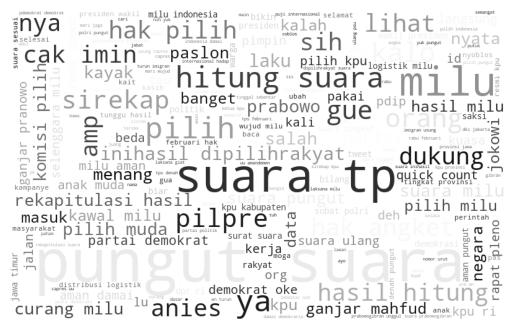

In [56]:
wc = WordCloud(background_color='white', colormap = 'binary',
     stopwords = ['meta'], width = 800, height = 500).generate(all_tweets_clean)
plt.axis("off")
plt.imshow(wc)

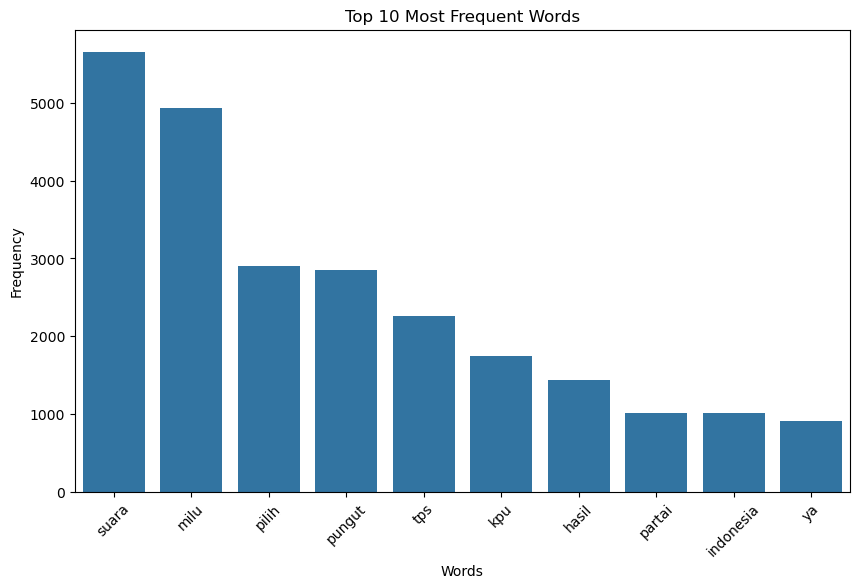

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import re

# Hapus tanda baca dan ubah menjadi huruf kecil
clean_text = re.sub(r'[^\w\s]', '', all_tweets_clean.lower())

# Pecah teks menjadi daftar kata-kata
words = clean_text.split()

# Hitung frekuensi kemunculan setiap kata
word_counts = Counter(words)

# Ambil 10 kata terbanyak
top_10_words = word_counts.most_common(10)

# Konversi ke DataFrame untuk digunakan di seaborn
df_top_10 = pd.DataFrame(top_10_words, columns=['word', 'count'])

# Plot barchart menggunakan seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='word', y='count', data=df_top_10)
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Memutar label kata agar lebih mudah dibaca
plt.show()


In [76]:
data['indoBert Classification'].value_counts()

indoBert Classification
netral     5914
negatif    3850
positif    1497
Name: count, dtype: int64

## Modelling

In [58]:
X = data['full_text']
y = data['indoBert Classification']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Tfidf_vect = TfidfVectorizer(max_features=5000)
X_train_Tfidf = Tfidf_vect.fit_transform(X_train)
X_test_Tfidf = Tfidf_vect.transform(X_test)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_Tfidf, y_train)

models = {
    'Naive Bayes': naive_bayes.MultinomialNB(),
    'SVM': SVC(probability=True)
}

param_grids = {
    'Naive Bayes': {'alpha': [0.1, 0.5, 1.0]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['rbf', 'linear']}
}

best_models = {}

for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_resampled, y_train_resampled)
    best_models[name] = grid_search.best_estimator_

    y_pred = best_models[name].predict(X_test_Tfidf)
    print(f"\n{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))

voting_clf = VotingClassifier(
    estimators=[(name, model) for name, model in best_models.items()],
    voting='soft'
)

voting_clf.fit(X_train_resampled, y_train_resampled)
y_pred_voting = voting_clf.predict(X_test_Tfidf)
print("\nVoting Classifier Accuracy:", accuracy_score(y_test, y_pred_voting))
print(classification_report(y_test, y_pred_voting))


Naive Bayes Accuracy: 0.7766
              precision    recall  f1-score   support

     negatif       0.71      0.90      0.79      1170
      netral       0.93      0.74      0.83      1760
     positif       0.55      0.61      0.58       449

    accuracy                           0.78      3379
   macro avg       0.73      0.75      0.73      3379
weighted avg       0.80      0.78      0.78      3379


SVM Accuracy: 0.8201
              precision    recall  f1-score   support

     negatif       0.75      0.86      0.80      1170
      netral       0.88      0.87      0.87      1760
     positif       0.78      0.53      0.63       449

    accuracy                           0.82      3379
   macro avg       0.80      0.75      0.77      3379
weighted avg       0.82      0.82      0.82      3379


Random Forest Accuracy: 0.7928
              precision    recall  f1-score   support

     negatif       0.74      0.84      0.79      1170
      netral       0.89      0.82      0.85  

In [66]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report
import cupy as cp

# Asumsikan 'data' sudah dimuat
X = data['full_text']
y = data['indoBert Classification']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# TF-IDF Vectorization (CPU)
Tfidf_vect = TfidfVectorizer(max_features=5000)
X_train_Tfidf = Tfidf_vect.fit_transform(X_train)
X_test_Tfidf = Tfidf_vect.transform(X_test)

# SMOTE (CPU)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_Tfidf, y_train)

# Convert to GPU arrays
X_train_gpu = cp.array(X_train_resampled.toarray())
y_train_gpu = cp.array(y_train_resampled)
X_test_gpu = cp.array(X_test_Tfidf.toarray())

models = {
    'Naive Bayes': MultinomialNB(),  # CPU
    'SVC': SVC(probability=True)
}

param_grids = {
    'Naive Bayes': {'alpha': [0.1, 0.5, 1.0]},
    'SVC': {'C': [0.1, 1, 10], 'kernel': ['rbf', 'linear']}
}

best_models = {}

for name, model in models.items():
    if name == 'Naive Bayes':
        # CPU-based Grid Search for Naive Bayes
        from sklearn.model_selection import GridSearchCV as SklearnGridSearchCV
        grid_search = SklearnGridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train_resampled, y_train_resampled)
    else:
        # GPU-based Grid Search for SVC and Random Forest
        grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy')
        grid_search.fit(X_train_gpu, y_train_gpu)
    
    best_models[name] = grid_search.best_estimator_
    
    if name == 'Naive Bayes':
        y_pred = best_models[name].predict(X_test_Tfidf)
    else:
        y_pred = best_models[name].predict(X_test_gpu)
    
    print(f"\n{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))

# Voting Classifier (CPU-based implementation)
voting_clf = VotingClassifier(
    estimators=[(name, model) for name, model in best_models.items()],
    voting='soft'
)

# Convert GPU models back to CPU for voting classifier
for name, model in best_models.items():
    if name != 'Naive Bayes':
        best_models[name] = model.to_sklearn()

voting_clf.fit(X_train_resampled, y_train_resampled)
y_pred_voting = voting_clf.predict(X_test_Tfidf)
print("\nVoting Classifier Accuracy:", accuracy_score(y_test, y_pred_voting))
print(classification_report(y_test, y_pred_voting))

c:\Users\asus.LAPTOP-P9TBK6TS.000\anaconda3\envs\skripsi-fix\Lib\site-packages\cupy\_environment.py:217: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(


ValueError: Unsupported dtype object

In [59]:
# Definisikan model
model = naive_bayes.MultinomialNB()

# Definisikan KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# List untuk menyimpan hasil akurasi setiap fold
accuracy_scores = []

# List untuk menyimpan classification report setiap fold
classification_reports = []

# Lakukan validasi silang manual
for fold, (train_index, test_index) in enumerate(kf.split(X_train_resampled)):
    # Pisahkan data ke dalam train dan test set berdasarkan fold
    X_train_fold, X_test_fold = X_train_resampled[train_index], X_train_resampled[test_index]
    y_train_fold, y_test_fold = y_train_resampled[train_index], y_train_resampled[test_index]

    # Fit model dengan data training
    model.fit(X_train_fold, y_train_fold)

    # Prediksi data test
    y_pred = model.predict(X_test_fold)

    # Hitung accuracy
    acc = accuracy_score(y_test_fold, y_pred)
    accuracy_scores.append(acc)

    scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=10, scoring='accuracy')

    # Hitung classification report
    report = classification_report(y_test_fold, y_pred, output_dict=True)
    classification_reports.append(report)

    # Tampilkan hasil per fold
    print(f"Fold {fold + 1}:")
    print(f"Fold {fold+1}: {scores[fold]:.4f}")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test_fold, y_pred))

# Tampilkan rata-rata akurasi
print(f"\nRata-rata akurasi: {np.mean(accuracy_scores):.4f}")
print(f"\nRata-rata cross_val_acc: {scores.mean():.4f}")


Fold 1:
Fold 1: 0.7915
Accuracy: 0.8140
              precision    recall  f1-score   support

     negatif       0.75      0.92      0.83       440
      netral       0.90      0.76      0.82       417
     positif       0.82      0.75      0.78       390

    accuracy                           0.81      1247
   macro avg       0.82      0.81      0.81      1247
weighted avg       0.82      0.81      0.81      1247

Fold 2:
Fold 2: 0.7875
Accuracy: 0.8107
              precision    recall  f1-score   support

     negatif       0.75      0.91      0.82       413
      netral       0.87      0.74      0.80       414
     positif       0.83      0.78      0.81       420

    accuracy                           0.81      1247
   macro avg       0.82      0.81      0.81      1247
weighted avg       0.82      0.81      0.81      1247

Fold 3:
Fold 3: 0.7849
Accuracy: 0.8331
              precision    recall  f1-score   support

     negatif       0.77      0.92      0.84       414
      net

In [60]:
joblib.dump(best_models['Naive Bayes'], 'best_model.joblib')
joblib.dump(Tfidf_vect, 'tfidf_vectorizer.joblib')

NameError: name 'best_model' is not defined

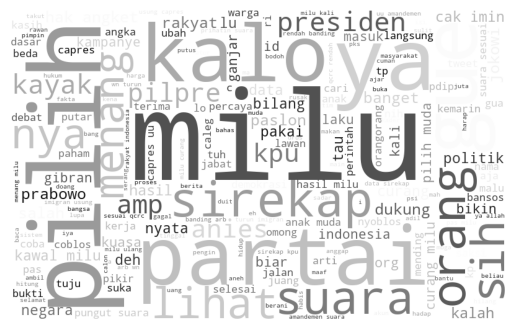

In [61]:
negative_tweets = data[data['indoBert Classification'] == 'negatif']['full_text']

# Gabungkan semua tweet negatif menjadi satu teks
all_negative_tweets = " ".join(tweet for tweet in negative_tweets)

# Buat WordCloud untuk kata-kata dari tweet dengan sentimen negatif
wc = WordCloud(background_color='white', colormap='binary',
               stopwords=['meta'], width=800, height=500).generate(all_negative_tweets)

# Tampilkan WordCloud
plt.axis("off")
plt.imshow(wc)
plt.show()


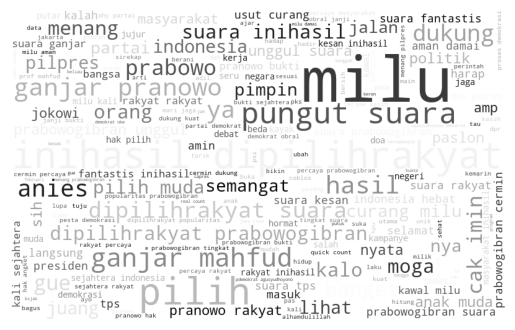

In [62]:
negative_tweets = data[data['indoBert Classification'] == 'positif']['full_text']

all_negative_tweets = " ".join(tweet for tweet in negative_tweets)

wc = WordCloud(background_color='white', colormap='binary',
               stopwords=['meta'], width=800, height=500).generate(all_negative_tweets)

plt.axis("off")
plt.imshow(wc)
plt.show()


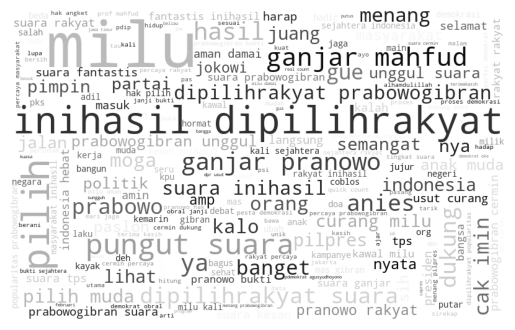

In [63]:
if data['indoBert Classification'].str.contains('netral').any():
    negative_tweets = data[data['indoBert Classification'] == 'positif']['full_text']

    all_negative_tweets = " ".join(tweet for tweet in negative_tweets)

    wc = WordCloud(background_color='white', colormap='binary',
                  stopwords=['meta'], width=800, height=500).generate(all_negative_tweets)
    plt.axis("off")
    plt.imshow(wc)
    plt.show()

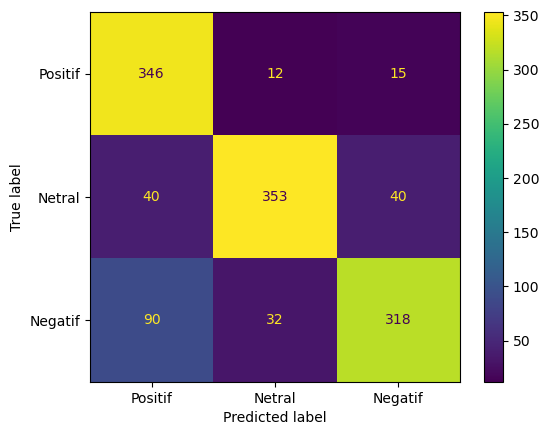

In [69]:
cm = confusion_matrix(y_test_fold, y_pred)
cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Positif', 'Netral', 'Negatif'])
cm.plot()

plt.grid(False)
plt.show()

In [65]:
end_time_code = time.time()

execution_time = end_time_code - start_time_code
print(f"Waktu eksekusi: {execution_time} detik")

Waktu eksekusi: 1437.9145555496216 detik
